# Bussiness Context :

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Apollo.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [6]:
df.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
#Checking Null Values
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [8]:
#Checking Duplicates
df.duplicated().sum()

1

In [9]:
#Getting duplicate row
df[df.duplicated()]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
581,19,male,no,northwest,10.2,0,4099


In [10]:
#removing duplicate row
df.drop(581,axis=0,inplace=True)

# -----------------------------------UNI-VARIATE ANALYSIS----------------------------------------

<AxesSubplot:xlabel='age'>

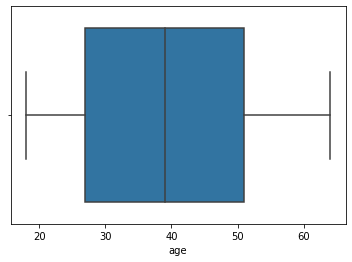

In [11]:
#checking if we have any outliers in age
sns.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

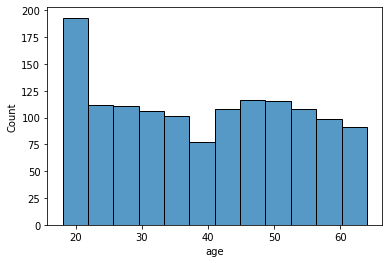

In [12]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='viral load'>

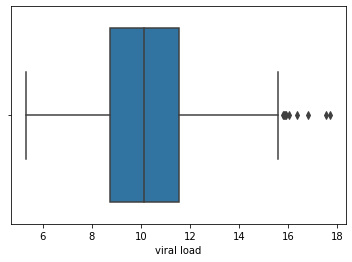

In [13]:
#checking if we have any outliers in viral load
sns.boxplot(df['viral load'])

<AxesSubplot:xlabel='viral load', ylabel='Density'>

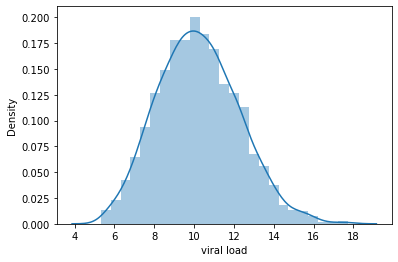

In [14]:
sns.distplot(df['viral load'])

viral load column follows normal distribution

<AxesSubplot:xlabel='severity level'>

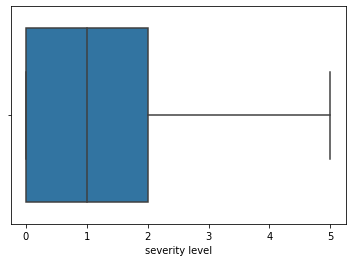

In [15]:
#checking if we have any outliers in severity level
sns.boxplot(df['severity level'])

<AxesSubplot:xlabel='severity level', ylabel='Count'>

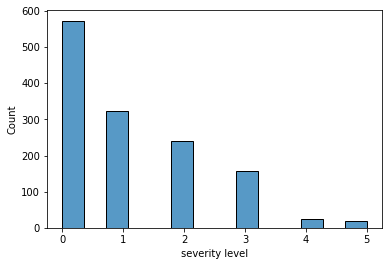

In [16]:
sns.histplot(df['severity level'])

<AxesSubplot:xlabel='hospitalization charges'>

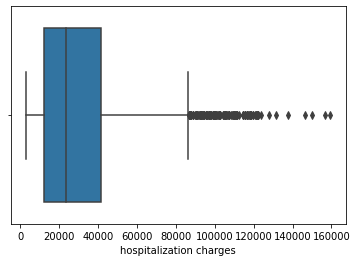

In [17]:
sns.boxplot(df['hospitalization charges'])

<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

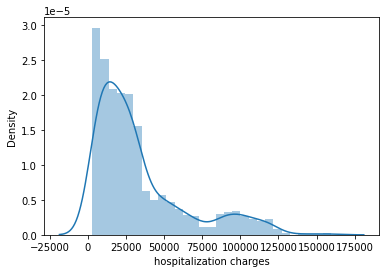

In [18]:
sns.distplot(df['hospitalization charges'])

Hospitalization charges is extremely right skewed distribution.

<AxesSubplot:xlabel='sex', ylabel='count'>

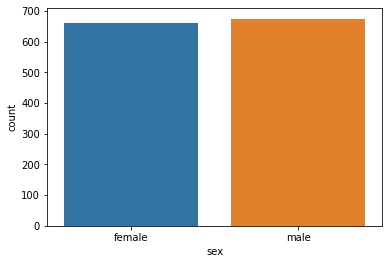

In [19]:
sns.countplot(df['sex'])

In [20]:
df['sex'].value_counts(normalize=True)

male      0.504862
female    0.495138
Name: sex, dtype: float64

There are almost equal amount of male and female patients and there is a just mere difference of 0.05 % between male and female count

<AxesSubplot:xlabel='smoker', ylabel='count'>

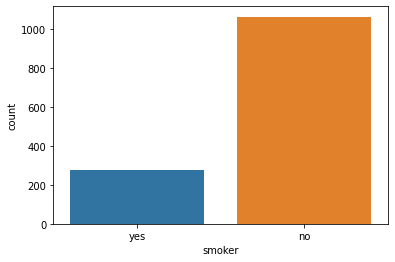

In [21]:
sns.countplot(df['smoker'])

In [22]:
df['smoker'].value_counts(normalize=True)

no     0.795064
yes    0.204936
Name: smoker, dtype: float64

Almost 80 percent of the patients are non smokers, onlu 20 percent of the patients are smokers

<AxesSubplot:xlabel='region', ylabel='count'>

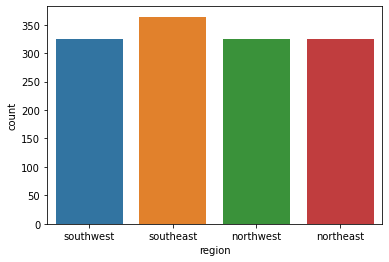

In [23]:
sns.countplot(df['region'])

In [24]:
df['region'].value_counts(normalize=True)

southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64

all the regions have almost same proportion of patients except south east region.South East has 0.03% larger number of patients compared to other regions

# ------------------------------- BI-VARIATE ANALYSIS ---------------------------------------------

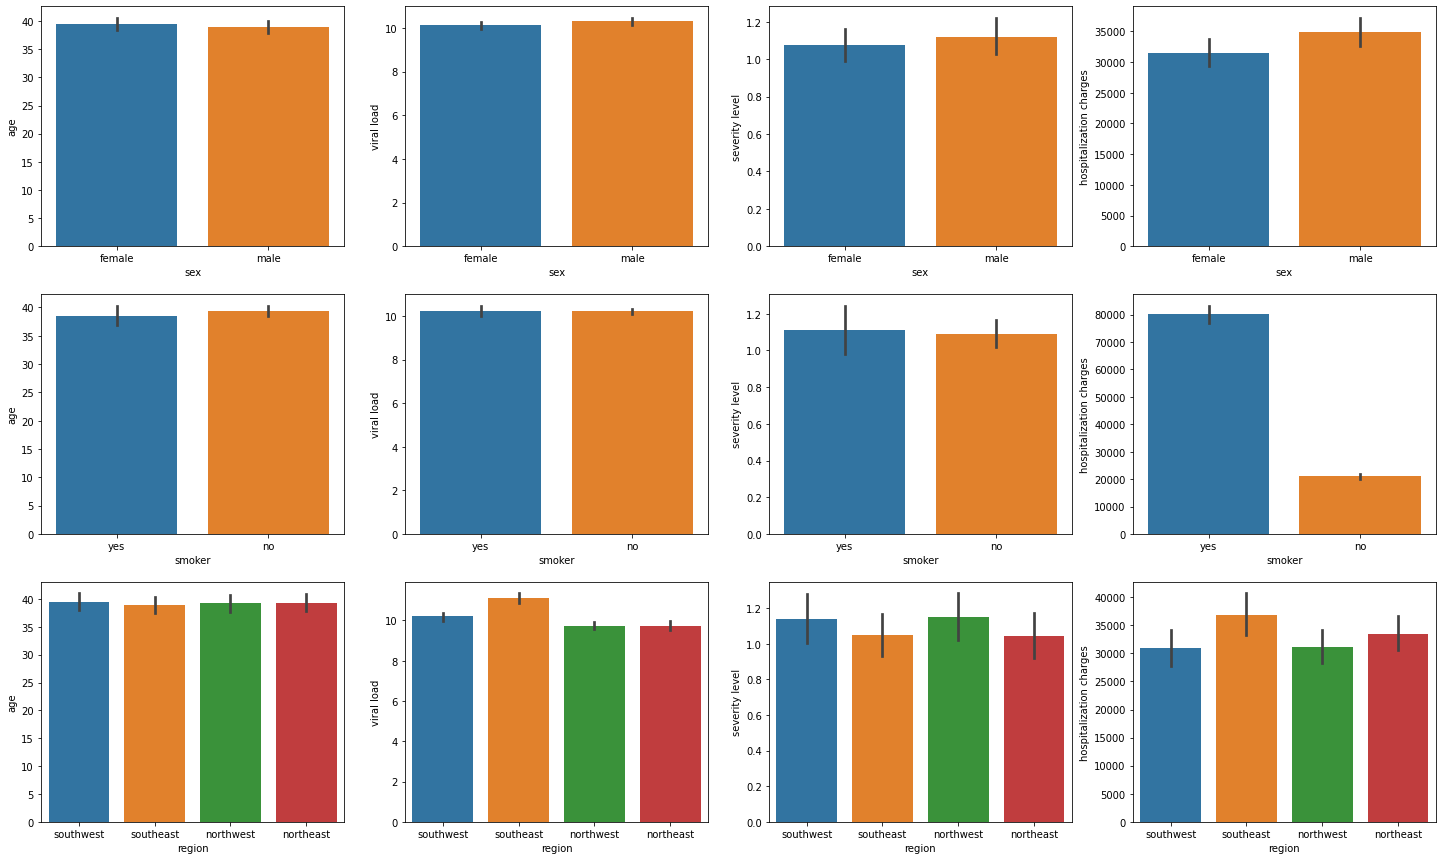

In [25]:
#Relation Between numerical and categorical variables
num_col=['age','viral load','severity level','hospitalization charges']
cat_col=['sex','smoker','region']

fig, axes = plt.subplots(3, 4, figsize=(25, 15))
for i in range(len(cat_col)):
    for j in range(len(num_col)):
        sns.barplot(df[cat_col[i]],df[num_col[j]],ax=axes[i, j])


* Proportion of male and female are same across all the regions except in south east.In South east Male population is graeter than female 
* Hospitalisation charges for female patients is lower compared to male patients 
* All the regions have same age groups
* Southeast region have high viral load and pay high amount of hospitalisation charges compared to other regions

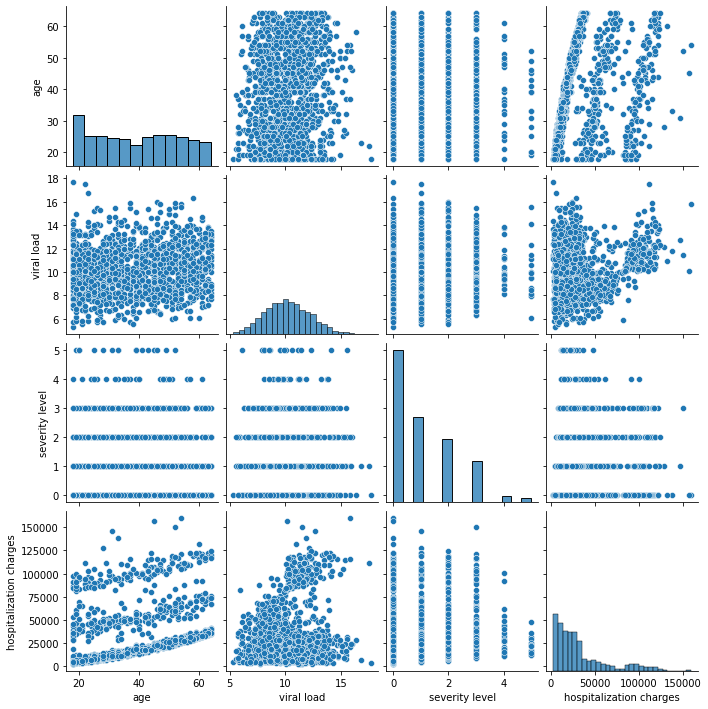

In [26]:
#Relation Between numerical variables
sns.pairplot(df)

<AxesSubplot:>

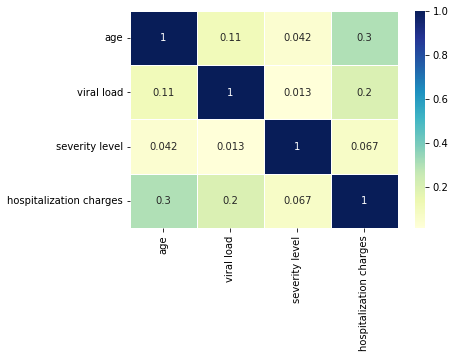

In [27]:
sns.heatmap(df.corr(), cmap ="YlGnBu", annot=True,linewidths = 0.5)

* None of the numerical columns are either highly positively or negitively correalted
* Age and Viral load columns are slightly positively correlated to hospilization charges
* Age and Viral load columns are slightly positively correlated

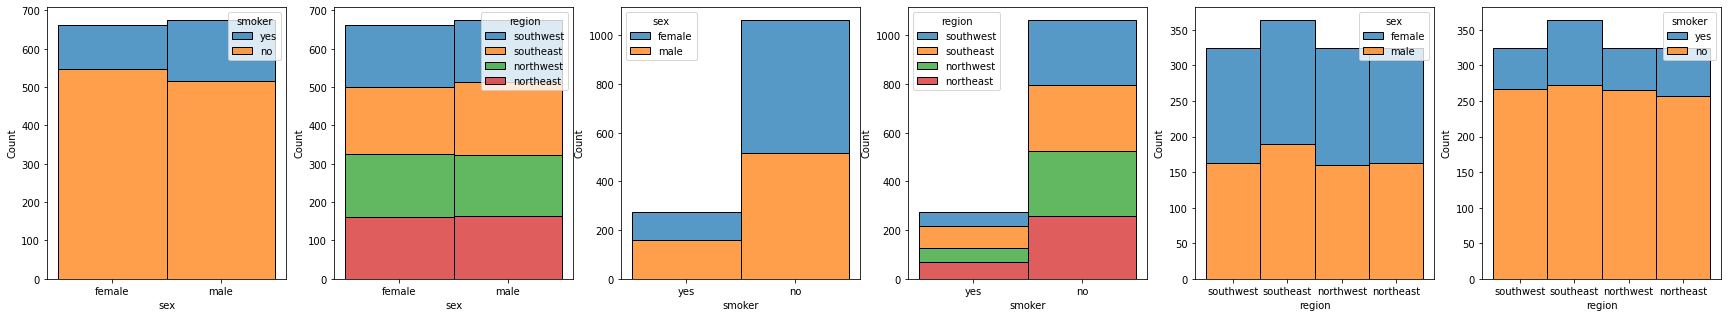

In [28]:
#relation between categorical variables
fig, axes = plt.subplots(1,6, figsize=(30,5))
count=0
for i in range(len(cat_col)):
    for j in range(len(cat_col)):
        if i!=j:
            sns.histplot(x=cat_col[i], hue=cat_col[j], data=df, stat="count", multiple="stack",ax=axes[count])
            count+=1
            

# -----------------------------MULTI-VARIATE ANALYSIS-------------------------------------------

<AxesSubplot:xlabel='age', ylabel='smoker'>

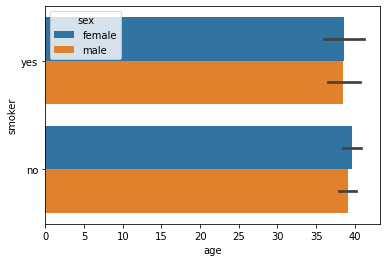

In [30]:
sns.barplot(df['age'],df["smoker"],hue=df['sex'])

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

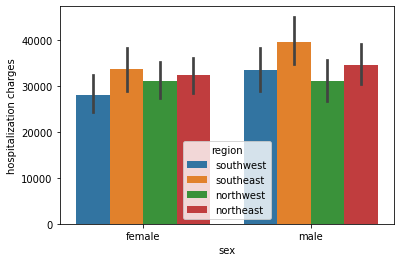

In [31]:
sns.barplot(df['sex'],df['hospitalization charges'],hue=df['region'])

* All the regions have male patients greater than female patients except in NorthWest. in Northwest female patients are sligtly larger compared to male
* Lowest number of female patient count was recorded in South West
* Southeast records largest number of male and female patients compared to all other regions

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

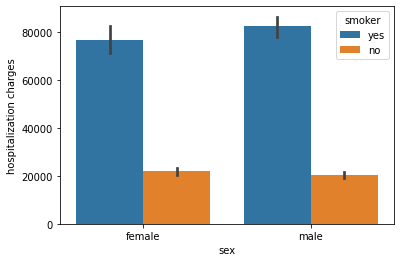

In [32]:
sns.barplot(df['sex'],df['hospitalization charges'],hue=df['smoker'])

* Hospitalisation charges for people who smoke is way larger than hospitalisation of charges who doesnt smoke

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

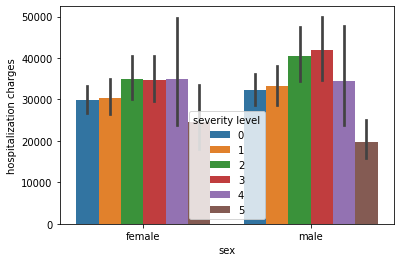

In [33]:
sns.barplot(df['sex'],df['hospitalization charges'],hue=df['severity level'])

* Patients who have severity level 5 has less hospitalization charges compared to other severity levels 
* Female patients of severity level 0 are higher compared to male patients of severity level 0
* Female patients of severity level 1,2,3,4 have less hospitalization charges compared to male patients of severity level 1,2,3,4

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

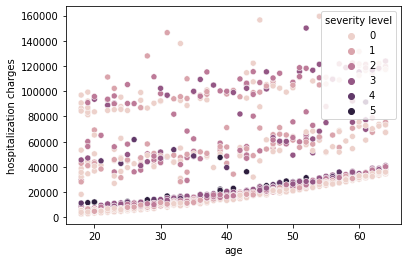

In [34]:
sns.scatterplot(df['age'],df['hospitalization charges'],hue=df['severity level'])

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

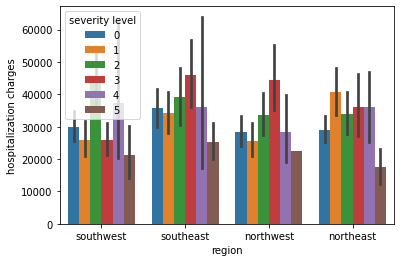

In [35]:
sns.barplot(df['region'],df['hospitalization charges'],hue=df['severity level'])

* Southwest region has higher cases of severity 2 level
* Southeast and north west region has higher cases of severity 3 level
* Northeast has higher cases of severity 1 level

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

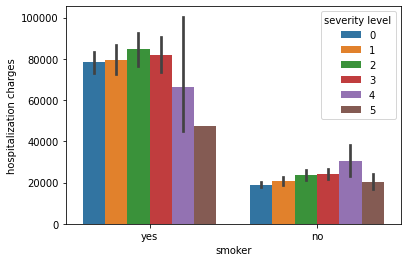

In [36]:
sns.barplot(df['smoker'],df['hospitalization charges'],hue=df['severity level'])

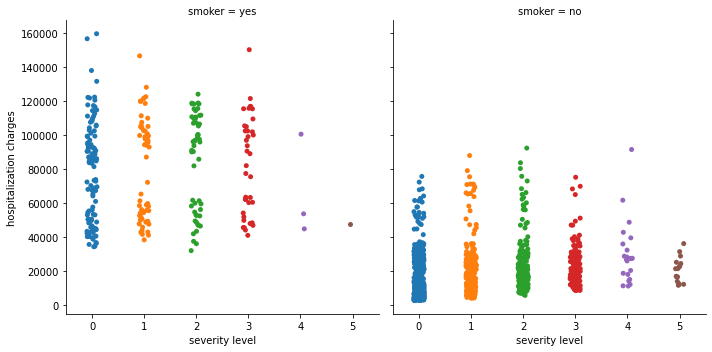

In [37]:
sns.catplot(data=df, x = 'severity level', y = 'hospitalization charges', col='smoker');

# ------------------------------------- Hypothesis Testing ---------------------------------------------

## Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

### T-TEST :

A t-test can only be used when comparing the means of two groups (a.k.a. pairwise comparison). If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test or a post-hoc test.

The t-test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. The t-test assumes your data:

* are independent
* are (approximately) normally distributed.
* have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

### Checking Assumptions For T-Test

In [38]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

### Sample indedependence exists since we are randomly selecting 274 values for smoker and non smoker.

In [39]:
smoker=df[df['smoker']=='yes'].sample(274)
non_smoker=df[df['smoker']=='no'].sample(274)

### Normality Test

hospitalization charges of given data (df) doesnt follow normal distribution p_val:8.761668448064204e-74
hospitalization charges of smoker doesnt follow normal distribution p_val:5.560432703059049e-14
hospitalization charges of non_smoker doesnt follow normal distribution p_val:5.189683606987243e-19


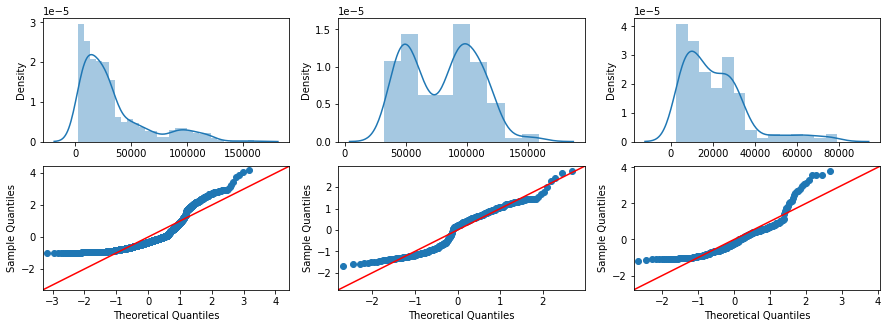

In [40]:
col=[df,smoker,non_smoker]
name=['given data (df)','smoker','non_smoker']
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
for i in range(len(col)):
    sns.distplot(ax=axes[0, i],x=col[i]['hospitalization charges'])
    sm.qqplot(col[i]['hospitalization charges'],line='45',fit=True,dist=stats.norm,ax=axes[1, i])
    p=stats.normaltest(col[i]['hospitalization charges']).pvalue
    if p<0.05:
        print('hospitalization charges of '+name[i]+' doesnt follow normal distribution p_val:'+str(p))
    else:
        print('hospitalization charges of '+name[i]+' follow normal distribution p_val:'+str(p))

### Levene test to check equality of variances

In [41]:
import scipy.stats as st

stat,p_val=st.levene(smoker['hospitalization charges'],non_smoker['hospitalization charges'],center='median')

if p_val<0.05:
    print('smoker and non smoker groups doesnot have similar amount of variance')
else:
    print('smoker and non smoker groups have similar amount of variance') 

smoker and non smoker groups doesnot have similar amount of variance


## Right tailed T-Test to prove hospitalization charges of people who do smoking are greater than those who don't

**Hypothesis:**<br><br>
$ H_{0}: $ $\mu_{non-smoker} \lt= \mu_{smoker} $ <br>
$ H_{1}: $ $\mu_{non-smoker} \gt \mu_{smoker} $


$\alpha = 0.05$

where, $\mu$ is the sample mean of hospitalization charges of people smoke and doesnt smoke

In [42]:
p=stats.ttest_ind(smoker['hospitalization charges'],non_smoker['hospitalization charges'],equal_var=False,alternative='greater').pvalue

In [43]:
if p<0.05:
    print('Alternate Hypothesis is accepted - Hospitalization charges of people who do smoking are greater than those who donot smoke')
else:
    print('Null Hypothesis is accepted - Hospitalization charges of people who do smoking are less than or equal to those who donot smoke')

Alternate Hypothesis is accepted - Hospitalization charges of people who do smoking are greater than those who donot smoke


## Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

In [44]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

### Checking Assumptions For T-Test

### Sample indedependence exists since we are randomly selecting 500 values for male and female.

In [45]:
male=df[df['sex']=='male'].sample(500)
female=df[df['sex']=='female'].sample(500)

### Normality Test

->given data (df) doesnt follow normal distribution p_val:0.00015815069842074636
->male doesnt follow normal distribution p_val:0.012121224057439324
->female doesnt follow normal distribution p_val:0.026229419355718542


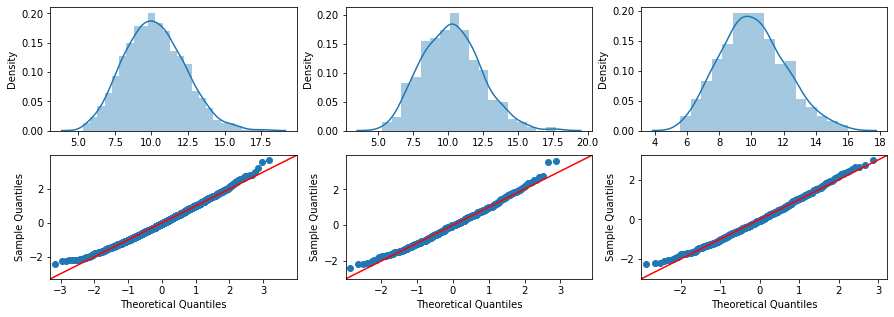

In [46]:

col=[df,male,female]
name=['given data (df)','male','female']
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
for i in range(len(col)):
    sns.distplot(ax=axes[0, i],x=col[i]['viral load'])
    sm.qqplot(col[i]['viral load'],line='45',fit=True,dist=stats.norm,ax=axes[1, i])
    p=stats.normaltest(col[i]['viral load']).pvalue
    if p<0.05:
        print('->'+name[i]+' doesnt follow normal distribution p_val:'+str(p))
    else:
        print('-->'+name[i]+' follow normal distribution p_val:'+str(p))

### Levene test to check equality of variances

In [47]:
stat,p_val=st.levene(male['viral load'],female['viral load'],center='mean')

if p_val<0.05:
    print('smoker and non smoker groups doesnot have similar amount of variance')
else:
    print('smoker and non smoker groups have similar amount of variance') 

smoker and non smoker groups have similar amount of variance


### T-Test to prove Viral load of females is different from that of males

**Hypothesis:**<br><br>
$ H_{0}: $ $\mu_{Female} = \mu_{Male} $ <br>
$ H_{1}: $ $\mu_{Female} \ne \mu_{Male} $


$\alpha = 0.05$

where, $\mu_{Female}$ and $\mu_{Male}$ are the sample mean of viral load of female and male

In [48]:
p=stats.ttest_ind(male['viral load'],female['viral load'],alternative='two-sided').pvalue
p

0.1656281004679383

In [49]:
if p<0.05:
    print('Alternate Hypothesis is accepted-Viral load of females is different from that of males')
else:
    print('Null Hypothesis is accepted-Viral load of females is similar to that of males')

Null Hypothesis is accepted-Viral load of females is similar to that of males


## Is the proportion of smoking significantly different across different regions?

#### Chi-square test : 

A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data.

**Assumptions:**
1. Both variables are categorical.
2. All observations are independent.
3. Cells in the contingency table are mutually exclusive.
4. Expected value of cells should be 5 or greater in at least 80% of cells.

## Checking Assumptions

In [50]:
ctab=pd.crosstab(df['smoker'],df['region'])
ctab

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


* Variables(Smoker and region) are categorical and independent
* Cells in the contingency table are mutually exclusive.both the variables are very different from each other
* Expected value of cells should be 5 or greater in at least 80% of cells.

### Chi Square test to prove of proportion of smoking significantly different across different regions

**Hypothesis:**<br><br>
Null Hypothesis: Proportion of smoking is same across different regions <br><br>
Alternate Hypothesis: Proportion of smoking is not same across different regions


$\alpha = 0.05$

<AxesSubplot:xlabel='region', ylabel='Count'>

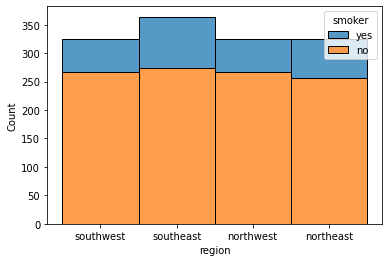

In [51]:
sns.histplot(binwidth=0.5, x="region", hue="smoker", data=df, stat="count", multiple="stack")

In [52]:
stat, p, dof, expected = chi2_contingency(ctab)

In [53]:
print(dof,stat,p)

3 7.277902541321909 0.06354826573182332


In [54]:
if p<0.05:
    print('Alternate Hypothesis is accepted - Proportion of smoking is not same across different regions')
else:
    print('Null Hypothesis is accepted - Proportion of smoking is same across different regions')

Null Hypothesis is accepted - Proportion of smoking is same across different regions


## Prove the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? 

### ANNOVA :

ANOVA, which stands for Analysis of Variance, is a statistical test used to analyze the difference between the means of more than two groups.

we use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels

**Assumptions:**

The results of a one-way ANOVA can be considered reliable as long as the following assumptions are met:

1. Response variable residuals are normally distributed (or approximately normally distributed).
2. Variances of populations are equal.
3. Responses for a given group are independent and identically distributed normal random variables (not a simple random sample (SRS)).

In [55]:
df['severity level'].value_counts(normalize=True)

0    0.428571
1    0.242334
2    0.179506
3    0.117427
4    0.018699
5    0.013463
Name: severity level, dtype: float64

In [56]:
#taking sample of female patients with severity level 0,1,2 
sample=df[(df['severity level']!=4) & (df['severity level']!=5) & (df['severity level']!=3)  & (df['sex']=='female')]

In [57]:
sample['severity level'].value_counts()

0    289
1    158
2    119
Name: severity level, dtype: int64

<AxesSubplot:title={'center':'viral load'}, xlabel='severity level'>

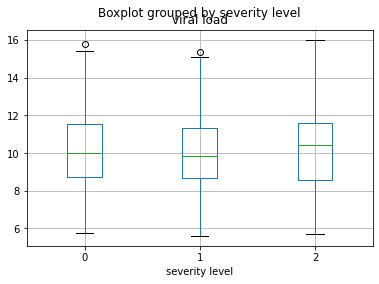

In [58]:
sample.boxplot('viral load',by='severity level')

## Checking Assumptions

### Sample indedependence exists since we are randomly selecting 100 values for all the three samples.

In [59]:
sample1=sample[sample['severity level']==0].sample(100)
sample2=sample[sample['severity level']==1].sample(100)
sample3=sample[sample['severity level']==2].sample(100)

### Normality Test

In [60]:
col=[sample1,sample2,sample3]

sample1 follow normal distribution
sample2 follow normal distribution
sample3 follow normal distribution


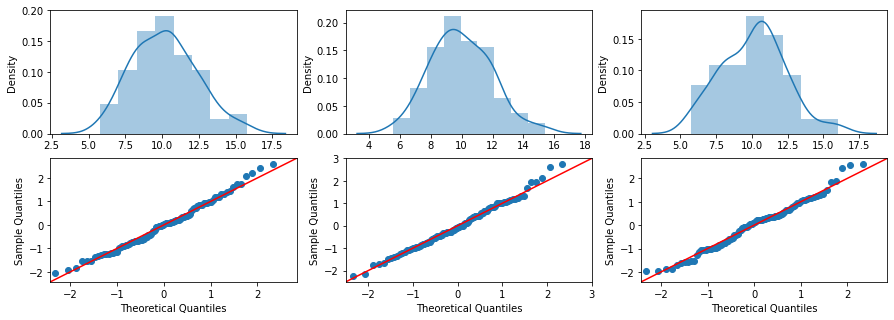

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
for i in range(len(col)):
    sns.distplot(ax=axes[0, i],x=col[i]['viral load'])
    sm.qqplot(col[i]['viral load'],line='45',fit=True,dist=stats.norm,ax=axes[1, i])
    p=stats.normaltest(col[i]['viral load']).pvalue
    if p<0.05:
        print('sample'+str(i+1)+' doesnt follow normal distribution')
    else:
        print('sample'+str(i+1)+' follow normal distribution')

### Levene test to check equality of variances

In [62]:
stat,p_val=st.levene(sample1['viral load'],sample2['viral load'],sample3['viral load'],center='mean')

In [63]:
if p_val<0.05:
    print('Variance of all the three samples are equal')
else:
    print('Variance of all the three samples are not equal')

Variance of all the three samples are not equal


### Anova to check if mean viral load of women with Severity levels 0,1,2 are the same

In [64]:
import pingouin as pg

aov = pg.anova(data=sample, dv='viral load', between='severity level', detailed=True)
print(aov)

           Source           SS   DF        MS         F     p-unc      np2
0  severity level     2.741077    2  1.370538  0.335506  0.715119  0.00119
1          Within  2299.847921  563  4.084987       NaN       NaN      NaN


In [65]:
if p<0.05:
    print('Alternate Hypothesis is accepted-mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level not the same')
else:
    print('Null Hypothesis is accepted-mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same')

Null Hypothesis is accepted-mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same


## Which variables are significant in predicting the reason for hospitalization for different regions

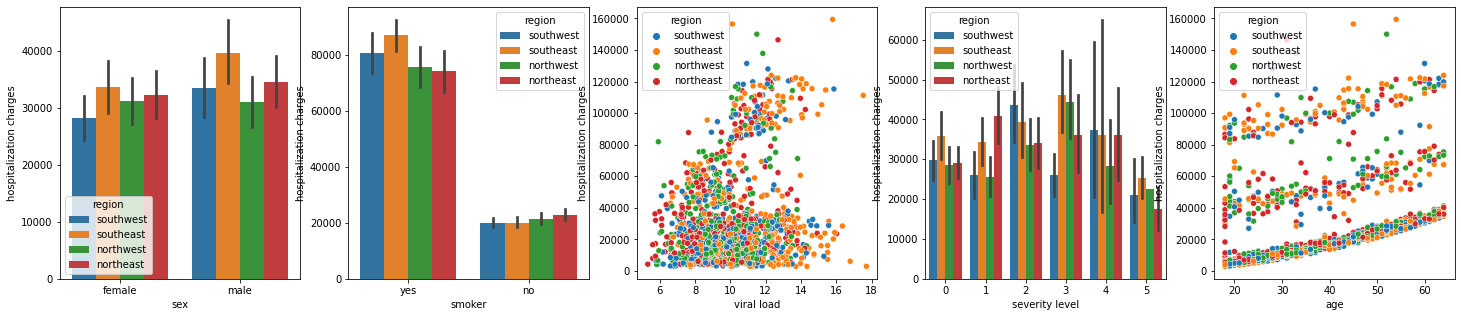

In [66]:
col=['sex','smoker','viral load','severity level','age']
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
c=0
for i in col:
    
    if i=='age' or i=='viral load':
        sns.scatterplot(df[i],df['hospitalization charges'],hue=df['region'],ax=axes[c])
    else:
        sns.barplot(df[i],df['hospitalization charges'],hue=df['region'],ax=axes[c])
        
    c+=1

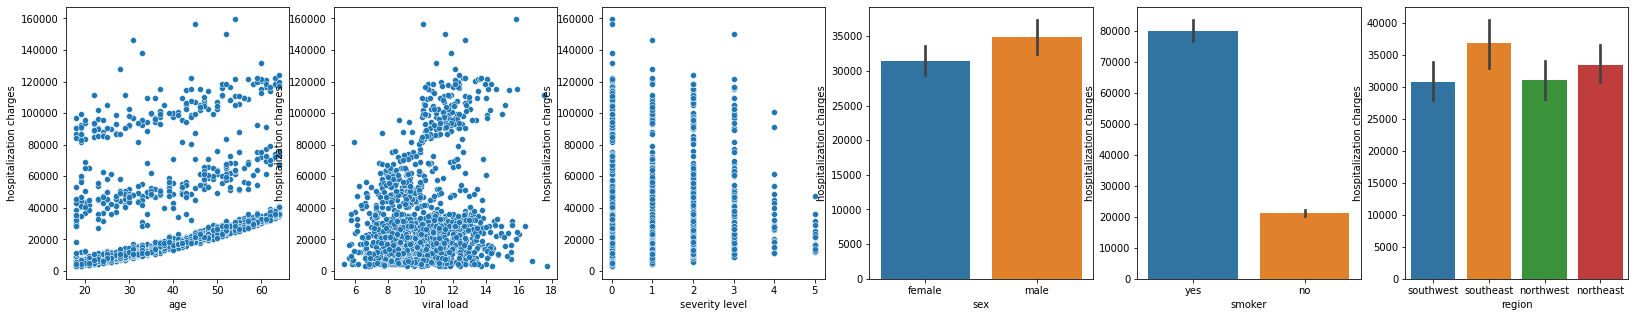

In [69]:
col=['age', 'viral load', 'severity level','sex', 'smoker', 'region']
fig, axes = plt.subplots(1, 6, figsize=(28, 5))
c=0
for i in col:
    if i in ['sex', 'smoker', 'region']:
        sns.barplot(df[i],df['hospitalization charges'],ax=axes[c])
    else:
        sns.scatterplot(df[i],df['hospitalization charges'],ax=axes[c])
    c+=1

* Smoker column is more significant  and age and viral load are less significant in predicting the reason for hospitalization for different regions